In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
import re
import seaborn as sns
import docx
import pylab
pd.set_option('display.max_rows', None)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy
import unicodeit

In [2]:
%matplotlib inline

In [3]:
#Define cell parameters
cell_dm_bohr = 19.3217899560
cell_dm_ang = cell_dm_bohr * 0.529177
cell_matrix = np.array([1.00000000000,  0.000000000000,  0.00000000000,
                          -0.500000000000,  0.866025403784,  0.000000000000, 
                          0.000000000000,  0.000000000000,  2.283539330750]).reshape(3,3)
cell_matrix = cell_matrix * cell_dm_ang

In [4]:
def qsline_to_coordinate(coord_line, cell_matrix):
    coord_list = coord_line.split()[1:4]
    atom_type = coord_line.split()[0]
    for n in range(len(coord_list)):
        coord_list[n] = re.sub("d","0",coord_list[n])
        coord_list[n] = float(coord_list[n])
    coord_array = np.array(coord_list).reshape(1,3)
    coord_array_ang = np.dot(coord_array,cell_matrix)
    return (atom_type,coord_array_ang)

In [5]:
def mol_orient(dissociated, adsorbed, max_nm_dist):
    if dissociated == 1:
        return None
    elif dissociated == 0 and adsorbed  == 1:
        if max_nm_dist > 2.85:
            return int(1) #vertical mol
        else:
            return int(0) #horizontal mol

In [6]:
Au_Cu_df = pd.read_csv('./2_Au_subCu/analysis.csv')
Ag_Cu_df = pd.read_csv('./1_Ag_subCu/analysis.csv')
CuNi_df = pd.read_csv('./0_CuNi//analysis.csv')
Fe_Ni_df = pd.read_csv('./9_Fe_subNi/analysis.csv')
Pd_Ni_df = pd.read_csv('./6_Pd_subNi/analysis.csv')
Pt_Ni_df = pd.read_csv('./7_Pt_subNi/analysis.csv')
Ag_Cu_df = pd.read_csv('./1_Ag_subCu/analysis.csv')
Pd_Cu_df = pd.read_csv('./11_Pd_subCu/analysis.csv')
Ag_Ni_df = pd.read_csv('./13_Ag_subNi/analysis.csv')
Au_Ni_df = pd.read_csv('./14_Au_subNi/analysis.csv')

In [7]:
#CuNi_df['adsorbed (<2.0)-H2'][7] = 1
#CuNi_df.to_csv('./0_CuNi//analysis.csv',index=False)
CuNi_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)


,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,0_CuNi,ad_site_1,-1.2708,2.820,1.6535,1.6545,1,1,NaN
1,0_CuNi,ad_site_2,-0.0492,0.806,1.8301,1.8324,1,0,0.0
2,0_CuNi,ad_site_3,-0.6704,0.906,1.5625,1.5765,1,0,0.0
3,0_CuNi,ad_site_4,-0.0637,0.765,3.6606,3.7362,0,0,NaN
4,0_CuNi,ad_site_5,-1.4722,2.949,1.6730,1.6950,1,1,NaN
5,0_CuNi,ad_site_6,-0.5590,0.901,1.5728,1.5808,1,0,0.0
6,0_CuNi,ad_site_7,-0.0667,0.766,3.5106,3.5641,0,0,NaN
7,0_CuNi,ad_site_8,-1.2687,2.610,3.8987,3.9502,1,1,NaN
8,0_CuNi,ad_site_9,-0.0659,0.764,3.5288,3.6132,0,0,NaN
9,0_CuNi,ad_site_10,-1.1826,2.487,1.6250,1.6470,1,1,NaN


In [8]:
#Ag_Cu_df['adsorbed (<2.0)-H2'][7] = 1
#Ag_Cu_df.to_csv('./1_Ag_subCu/analysis.csv',index=False)
Ag_Cu_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,1_Ag_subCu,ad_site_1,-1.2701,2.829,1.6496,1.6588,1,1,NaN
1,1_Ag_subCu,ad_site_2,-0.0342,0.804,1.8376,1.8579,1,0,0.0
2,1_Ag_subCu,ad_site_3,-0.6643,0.908,1.5643,1.5737,1,0,0.0
3,1_Ag_subCu,ad_site_4,-1.2705,5.838,1.6352,2.9788,1,1,NaN
4,1_Ag_subCu,ad_site_5,-1.4698,2.955,1.6740,1.7016,1,1,NaN
5,1_Ag_subCu,ad_site_6,-0.5491,0.901,1.5730,1.5847,1,0,0.0
6,1_Ag_subCu,ad_site_7,-1.4126,2.909,1.6588,1.6868,1,1,NaN
7,1_Ag_subCu,ad_site_8,-1.2699,2.833,2.8616,3.1409,1,1,NaN
8,1_Ag_subCu,ad_site_9,-0.0324,0.806,2.7973,3.2974,0,0,NaN
9,1_Ag_subCu,ad_site_10,-1.2567,2.815,1.6269,1.6719,1,1,NaN


In [9]:
#Au_Cu_df['adsorbed (<2.0)-H2'][7] = 1
#Au_Cu_df.to_csv('./2_Au_subCu/analysis.csv',index=False)
Au_Cu_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,2_Au_subCu,ad_site_1,-1.2261,2.850,1.6515,1.6677,1,1,NaN
1,2_Au_subCu,ad_site_2,-0.0529,0.797,1.8891,1.9165,1,0,0.0
2,2_Au_subCu,ad_site_3,-0.6448,0.899,1.5701,1.5818,1,0,0.0
3,2_Au_subCu,ad_site_4,-1.2316,5.926,1.6315,3.0518,1,1,NaN
4,2_Au_subCu,ad_site_5,-1.4368,2.978,1.6753,1.7035,1,1,NaN
5,2_Au_subCu,ad_site_6,-0.5145,0.886,1.5884,1.5916,1,0,0.0
6,2_Au_subCu,ad_site_7,-0.5666,0.894,1.5771,1.5795,1,0,0.0
7,2_Au_subCu,ad_site_8,-1.2259,2.854,2.9508,3.2107,1,1,NaN
8,2_Au_subCu,ad_site_9,-0.0790,0.765,3.7208,3.7807,0,0,NaN
9,2_Au_subCu,ad_site_10,-1.2182,2.841,1.6302,1.6788,1,1,NaN


In [10]:
Pd_Ni_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,6_Pd_subNi,ad_site_1,-1.2597,2.603,1.6486,1.6526,1,1,NaN
1,6_Pd_subNi,ad_site_2,-0.0496,0.805,1.8312,1.8366,1,0,0.0
2,6_Pd_subNi,ad_site_3,-0.6707,0.909,1.5649,1.5731,1,0,0.0
3,6_Pd_subNi,ad_site_4,-0.0693,0.765,2.7252,2.8532,0,0,NaN
4,6_Pd_subNi,ad_site_5,-1.2855,3.451,1.6528,1.8591,1,1,NaN
5,6_Pd_subNi,ad_site_6,-0.5519,0.899,1.5718,1.5822,1,0,0.0
6,6_Pd_subNi,ad_site_7,-1.3773,2.616,1.6516,1.6783,1,1,NaN
7,6_Pd_subNi,ad_site_8,-0.6703,0.908,1.5658,1.5746,1,0,0.0
8,6_Pd_subNi,ad_site_9,-0.0713,0.764,3.5596,3.6635,0,0,NaN
9,6_Pd_subNi,ad_site_10,-1.0805,2.349,1.6131,1.6347,1,1,NaN


In [11]:
Pt_Ni_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,7_Pt_subNi,ad_site_1,-1.2717,2.792,1.6452,1.6570,1,1,NaN
1,7_Pt_subNi,ad_site_2,-0.0551,0.805,1.8308,1.8371,1,0,0.0
2,7_Pt_subNi,ad_site_3,-0.6366,0.899,1.5713,1.5838,1,0,0.0
3,7_Pt_subNi,ad_site_4,-0.0732,0.764,2.7328,2.7734,0,0,NaN
4,7_Pt_subNi,ad_site_5,-1.1479,2.922,1.6785,1.8136,1,1,NaN
5,7_Pt_subNi,ad_site_6,-0.5238,0.893,1.5797,1.5839,1,0,0.0
6,7_Pt_subNi,ad_site_7,-1.3985,2.618,1.6515,1.6763,1,1,NaN
7,7_Pt_subNi,ad_site_8,-1.2689,2.603,1.8291,3.1487,1,1,NaN
8,7_Pt_subNi,ad_site_9,-0.0719,0.765,3.5546,3.6522,0,0,NaN
9,7_Pt_subNi,ad_site_10,-1.1108,2.556,1.6130,1.6735,1,1,NaN


In [12]:
Fe_Ni_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,9_Fe_subNi,ad_site_1,1774.4169,2.603,1.6486,1.6526,1,1,NaN
1,9_Fe_subNi,ad_site_2,1775.6270,0.805,1.8312,1.8366,1,0,0.0
2,9_Fe_subNi,ad_site_3,1775.0059,0.909,1.5649,1.5731,1,0,0.0
3,9_Fe_subNi,ad_site_4,1775.6073,0.765,2.7252,2.8532,0,0,NaN
4,9_Fe_subNi,ad_site_5,1774.3911,3.451,1.6528,1.8591,1,1,NaN
5,9_Fe_subNi,ad_site_6,1775.1247,0.899,1.5718,1.5822,1,0,0.0
6,9_Fe_subNi,ad_site_7,1774.2993,2.616,1.6516,1.6783,1,1,NaN
7,9_Fe_subNi,ad_site_8,1775.0063,0.908,1.5658,1.5746,1,0,0.0
8,9_Fe_subNi,ad_site_9,1775.6053,0.764,3.5596,3.6635,0,0,NaN
9,9_Fe_subNi,ad_site_10,1774.5961,2.349,1.6131,1.6347,1,1,NaN


In [13]:
Pd_Cu_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,11_Pd_subCu,ad_site_1,-1.2425,2.832,1.6431,1.6814,1,1,NaN
1,11_Pd_subCu,ad_site_2,-0.0538,0.807,1.8293,1.8313,1,0,0.0
2,11_Pd_subCu,ad_site_3,-0.6340,0.905,1.5664,1.5765,1,0,0.0
3,11_Pd_subCu,ad_site_4,-1.1494,3.401,1.6433,1.8701,1,1,NaN
4,11_Pd_subCu,ad_site_5,-1.3680,2.565,1.6566,1.7016,1,1,NaN
5,11_Pd_subCu,ad_site_6,-0.5337,0.903,1.5738,1.5837,1,0,0.0
6,11_Pd_subCu,ad_site_7,-1.3454,2.610,1.6715,1.6793,1,1,NaN
7,11_Pd_subCu,ad_site_8,-1.2212,2.608,1.8793,3.2022,1,1,NaN
8,11_Pd_subCu,ad_site_9,-0.0533,0.808,2.7764,3.3162,0,0,NaN
9,11_Pd_subCu,ad_site_10,-1.1575,2.484,1.6286,1.6592,1,1,NaN


In [14]:
Ag_Ni_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,13_Ag_subNi,ad_site_1,-1.2630,2.605,1.6501,1.6524,1,1,NaN
1,13_Ag_subNi,ad_site_2,-0.0858,0.766,2.8147,3.2310,0,0,NaN
2,13_Ag_subNi,ad_site_3,-0.6810,0.909,1.5666,1.5759,1,0,0.0
3,13_Ag_subNi,ad_site_4,-0.0868,0.766,2.7855,3.2282,0,0,NaN
4,13_Ag_subNi,ad_site_5,-1.2599,5.639,1.6503,2.8584,1,1,NaN
5,13_Ag_subNi,ad_site_6,-0.5790,0.906,1.5671,1.5790,1,0,0.0
6,13_Ag_subNi,ad_site_7,-1.3712,2.607,1.6484,1.6746,1,1,NaN
7,13_Ag_subNi,ad_site_8,-1.2634,2.602,1.8467,3.1235,1,1,NaN
8,13_Ag_subNi,ad_site_9,-0.0683,0.765,3.3850,3.4639,0,0,NaN
9,13_Ag_subNi,ad_site_10,-0.8872,2.181,1.6033,1.6130,1,1,NaN


In [15]:
Au_Ni_df#.sort_values(by='adsorption_energy (eV)-H2',ascending=True)

,system,site_number,adsorption_energy (eV)-H2,HH_distance (ang)-H2,min mol_M distance-H2,max mol_M distance-H2,adsorbed (<2.0)-H2,dissociated (<1.10)-H2,mol_orient_vert(max_HM_dist > 2.8)-H2
0,14_Au_subNi,ad_site_1,-1.2676,2.610,1.6499,1.6524,1,1,NaN
1,14_Au_subNi,ad_site_2,-1.2677,2.611,1.6493,1.6536,1,1,NaN
2,14_Au_subNi,ad_site_3,-1.2676,2.610,1.6499,1.6524,1,1,NaN
3,14_Au_subNi,ad_site_4,-0.0772,0.765,2.7125,2.7773,0,0,NaN
4,14_Au_subNi,ad_site_5,-1.2156,5.737,1.6536,2.9478,1,1,NaN
5,14_Au_subNi,ad_site_6,-0.5710,0.899,1.5753,1.5798,1,0,0.0
6,14_Au_subNi,ad_site_7,-1.3875,2.621,1.6486,1.6809,1,1,NaN
7,14_Au_subNi,ad_site_8,-1.2688,2.607,1.8425,3.1288,1,1,NaN
8,14_Au_subNi,ad_site_9,-0.0743,0.765,3.4188,3.7238,0,0,NaN
9,14_Au_subNi,ad_site_10,-0.8292,2.264,1.6075,1.6169,1,1,NaN


In [16]:
Ag_Cu_df.columns

Index(['system', 'site_number', 'adsorption_energy (eV)-H2',
       'HH_distance (ang)-H2', 'min mol_M distance-H2',
       'max mol_M distance-H2', 'adsorbed (<2.0)-H2', 'dissociated (<1.10)-H2',
       'mol_orient_vert(max_HM_dist > 2.8)-H2'],
      dtype='object')

In [17]:
adsorption_char_df= pd.read_csv('./H2_final_comparison.csv')
adsorption_char_df

,system,n_adsorbed + n_dissociated,n_adsorbed,n_dissociated,n_not_adsorbed,n_vertical_mol,n_horiz_mol
0,CuNi,16,3,13,3,0,3
1,Ag@Cu,18,3,15,1,0,3
2,Au@Cu,18,5,13,1,0,5
3,Pd@Ni,17,4,13,2,0,4
4,Pt@Ni,17,3,14,2,0,3
5,Fe@Ni,17,4,13,2,0,4
6,Pd@Cu,18,3,15,1,0,3
7,Ag@Ni,16,2,14,3,0,2
8,Au@Ni,17,1,16,2,0,1


No handles with labels found to put in legend.


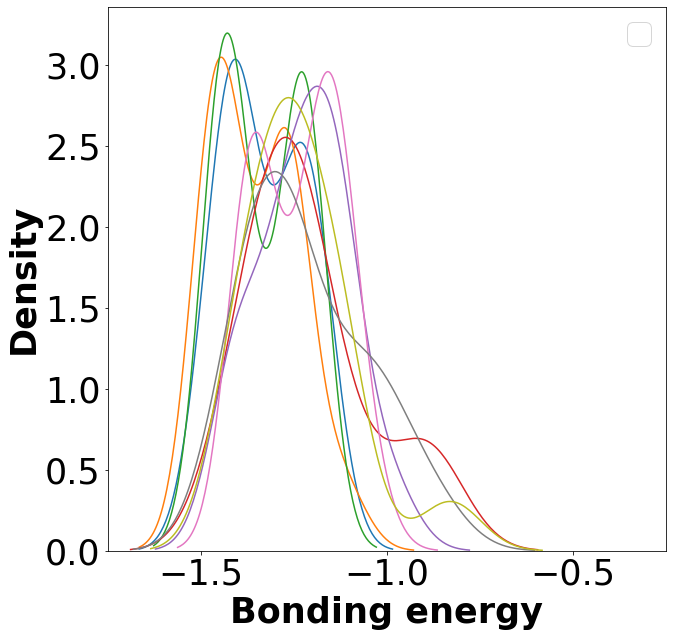

In [18]:
all_dfs = [CuNi_df,Ag_Cu_df, Au_Cu_df, Pd_Ni_df, Pt_Ni_df, Fe_Ni_df, Pd_Cu_df, Ag_Ni_df, Au_Ni_df]
names = ['CuNi',
     'Ag@Cu',
     'Au@Cu',
     'Pd@Ni',
     'Pt@Ni',
     'Fe@Ni',
     'Pd@Cu',
     'Ag@Ni',
     'Au@Ni']
#x_labels = ['top','bridge','hollow']
#colors = ['red','green','blue']

fig, axes = plt.subplots(1,1,figsize = (10,10),sharey=False)
axes.set_xlim([-1.75, -0.25])
for i in range(len(all_dfs)):
    df_modified = all_dfs[i]
    df_modified = df_modified[(df_modified['adsorbed (<2.0)-H2']==1) & (df_modified['dissociated (<1.10)-H2']==1)]
    #name = x_labels[i]
    sns.kdeplot(df_modified['adsorption_energy (eV)-H2'])#,
                #color=colors[i],linewidth=4,label=f'{x_labels[i]}')
axes.legend(loc='upper right', fontsize=30)
axes.set_xlabel("Bonding energy",fontsize=35,weight='bold')
axes.set_ylabel("Density",fontsize=35,weight='bold')
axes.tick_params(axis="x",labelsize=35)
axes.tick_params(axis="y",labelsize=35)
#plt.savefig('./adsE_dens.pdf',bbox_inches='tight',dpi=500)
plt.show()

In [19]:
all_dfs = [CuNi_df,
           Ag_Cu_df, 
           Au_Cu_df, 
           Pd_Ni_df, 
           Pt_Ni_df, 
           #Fe_Ni_df, 
           Pd_Cu_df, 
           Ag_Ni_df, 
           Au_Ni_df]
names = ['CuNi',
     'Ag@Cu',
     'Au@Cu',
     'Pd@Ni',
     'Pt@Ni',
     #'Fe@Ni',
     'Pd@Cu',
     'Ag@Ni',
     'Au@Ni']
medians_diss = []
for i in range(len(all_dfs)):
    df = all_dfs[i]
    medians_diss.append((names[i], df[(df['dissociated (<1.10)-H2']==1) & (df['adsorbed (<2.0)-H2']==1)]['adsorption_energy (eV)-H2'].median()))
    
medians_ads = []
for i in range(len(all_dfs)):
    df = all_dfs[i]
    medians_ads.append((names[i], df[df['adsorbed (<2.0)-H2']==1]['adsorption_energy (eV)-H2'].median()))
    
medians_HH_dist = []
for i in range(len(all_dfs)):
    df = all_dfs[i]
    medians_HH_dist.append((names[i], df[(df['dissociated (<1.10)-H2']==0) & (df['adsorbed (<2.0)-H2']==1)]['HH_distance (ang)-H2'].median()))
    
medians_df = pd.DataFrame()
medians_df['system'] = names
medians_df['diss_HH_adsE'] = [i[1] for i in medians_diss]
medians_df['ads_HH_adsE'] = [i[1] for i in medians_ads]
medians_df['HH_dist'] = [i[1] for i in medians_HH_dist]
medians_df

,system,diss_HH_adsE,ads_HH_adsE,HH_dist
0,CuNi,-1.39290,-1.26975,0.9010
1,Ag@Cu,-1.41250,-1.27050,0.9010
2,Au@Cu,-1.36560,-1.22670,0.8940
3,Pd@Ni,-1.25970,-1.19700,0.9035
4,Pt@Ni,-1.22745,-1.14790,0.8930
5,Pd@Cu,-1.22120,-1.16680,0.9030
6,Ag@Ni,-1.26320,-1.26145,0.9075
7,Au@Ni,-1.26765,-1.26760,0.8990


In [20]:
medians_df.sort_values(by='diss_HH_adsE')

,system,diss_HH_adsE,ads_HH_adsE,HH_dist
1,Ag@Cu,-1.41250,-1.27050,0.9010
0,CuNi,-1.39290,-1.26975,0.9010
2,Au@Cu,-1.36560,-1.22670,0.8940
7,Au@Ni,-1.26765,-1.26760,0.8990
6,Ag@Ni,-1.26320,-1.26145,0.9075
3,Pd@Ni,-1.25970,-1.19700,0.9035
4,Pt@Ni,-1.22745,-1.14790,0.8930
5,Pd@Cu,-1.22120,-1.16680,0.9030


In [21]:
medians_df.sort_values(by='ads_HH_adsE')

,system,diss_HH_adsE,ads_HH_adsE,HH_dist
1,Ag@Cu,-1.41250,-1.27050,0.9010
0,CuNi,-1.39290,-1.26975,0.9010
7,Au@Ni,-1.26765,-1.26760,0.8990
6,Ag@Ni,-1.26320,-1.26145,0.9075
2,Au@Cu,-1.36560,-1.22670,0.8940
3,Pd@Ni,-1.25970,-1.19700,0.9035
5,Pd@Cu,-1.22120,-1.16680,0.9030
4,Pt@Ni,-1.22745,-1.14790,0.8930


No handles with labels found to put in legend.


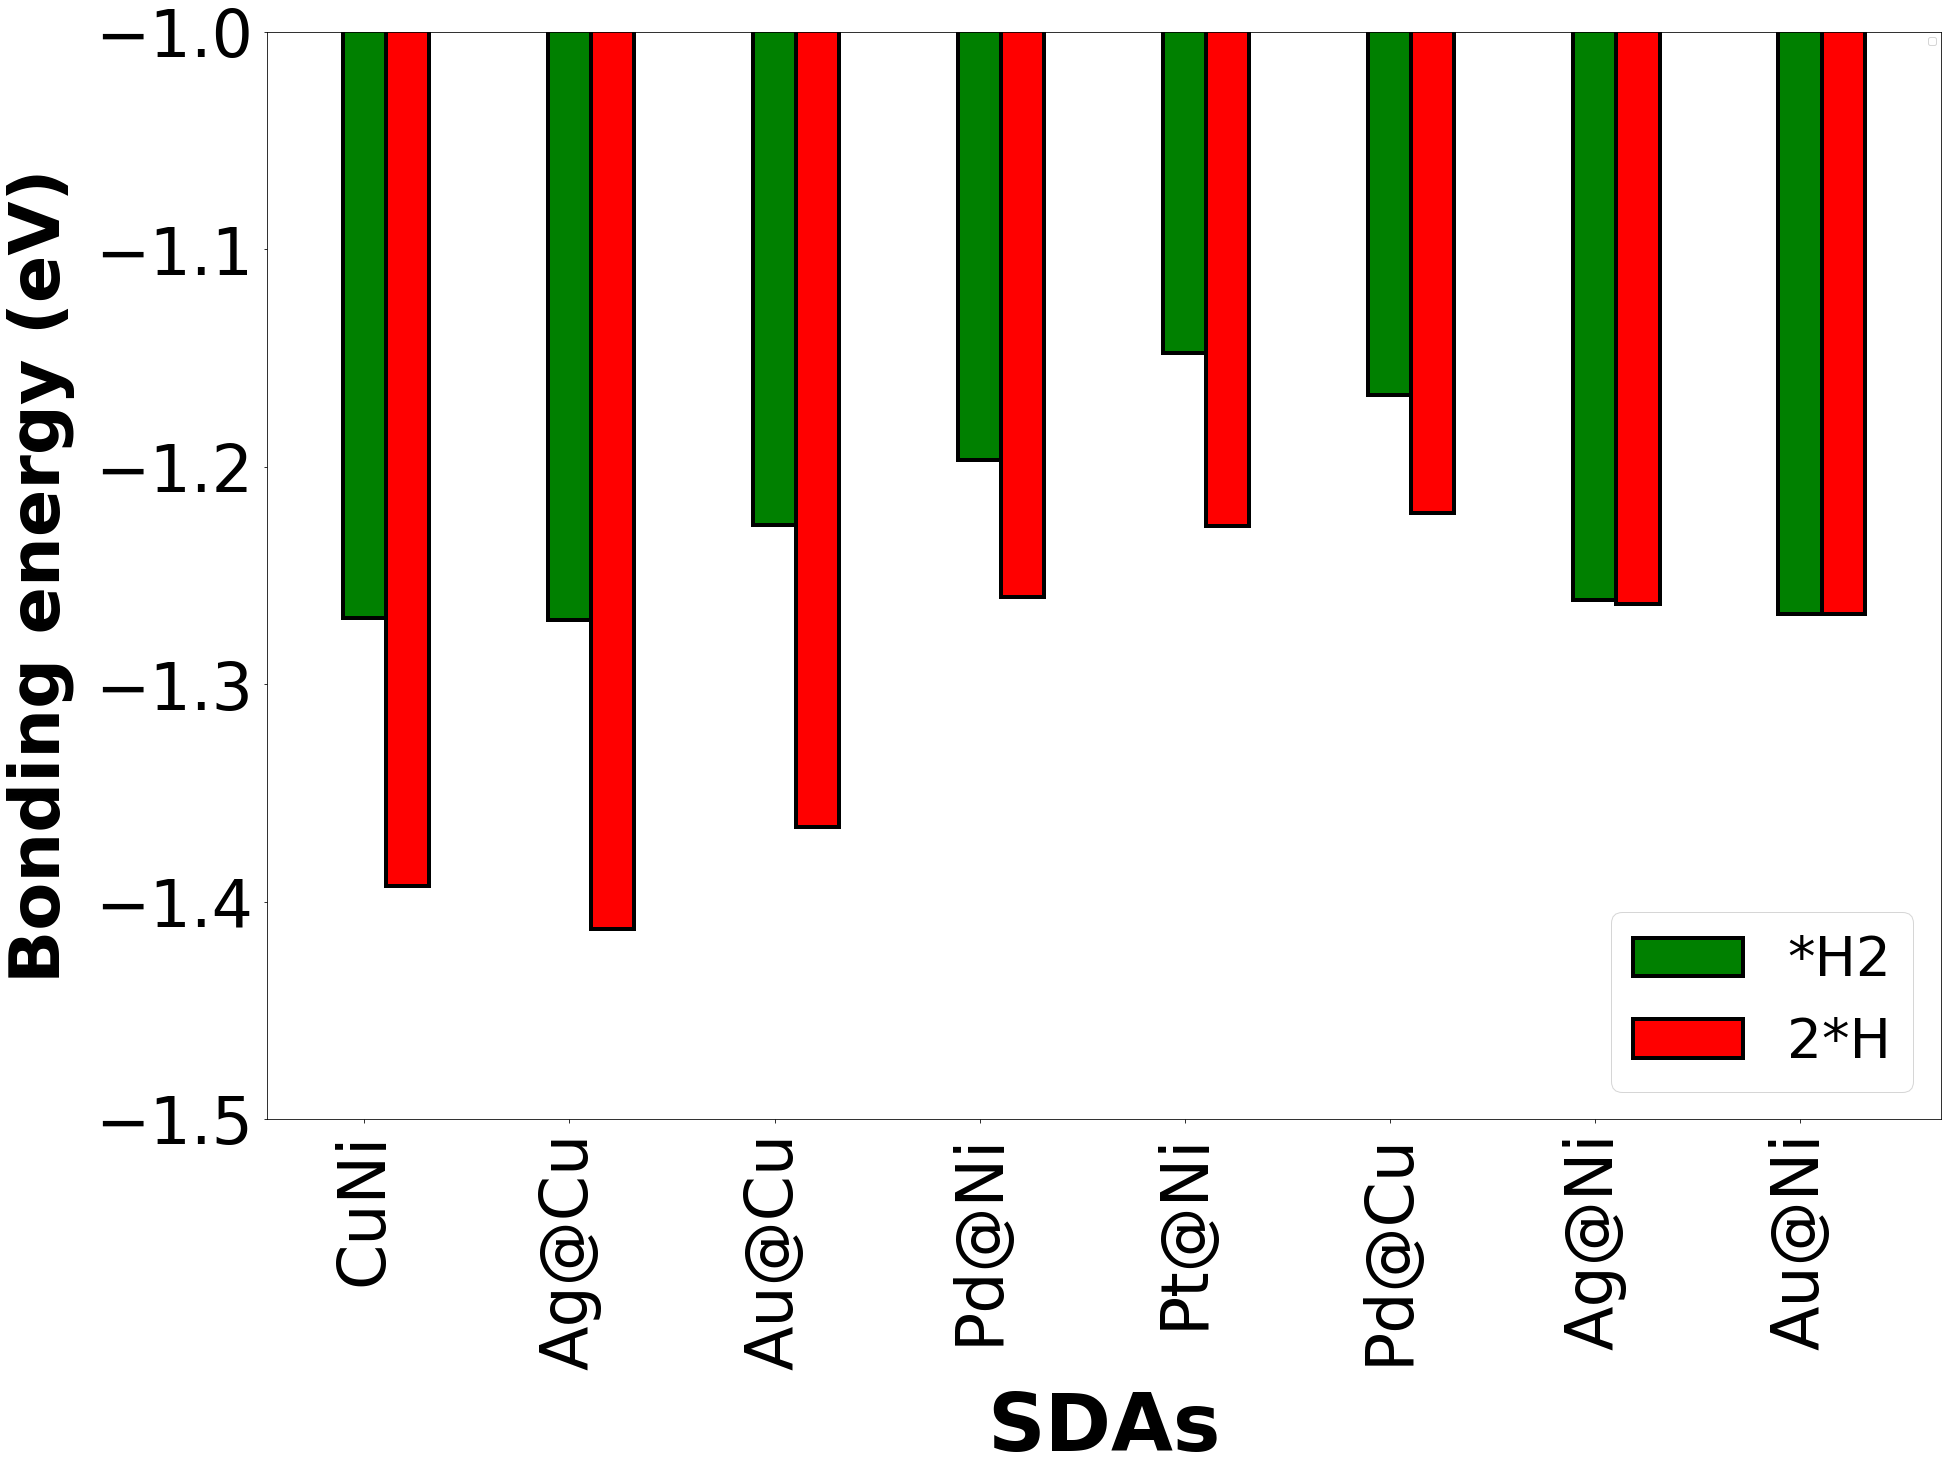

In [22]:
all_df = [CuNi_df,
          Pd_Ni_df, 
          Pd_Cu_df, 
          #Fe_Ni_df, 
          Ag_Cu_df, 
          Ag_Ni_df, 
          Pt_Ni_df, 
          Au_Cu_df,
          Au_Ni_df]

names_df = ['CuNi',
            'Pd@Ni',
            'Pd@Cu',
            #'Fe@Ni',
            'Ag@Cu',
            'Ag@Ni',
            'Pt@Ni',
            'Au@Cu',
            'Au@Ni']


colors = ['lightseagreen',
          'lightcoral',
          'indianred',
          #'sandybrown',
          'palevioletred',
          'olive',
          'skyblue',
          'yellowgreen',
          'forestgreen']
color_dict = {}

for i in range(len(names_df)):
    color_dict[i] = colors[i]
    
pylab.rcParams['xtick.major.pad']='10'
pylab.rcParams['ytick.major.pad']='10'

# Set the width of the bars
barWidth = 0.21
bar_group_dist = 0.21

df = medians_df

# Set the position of the bars on the x-axis
x_labels = ['CuNi',
     'Ag@Cu',
     'Au@Cu',
     'Pd@Ni',
     'Pt@Ni',
     #'Fe@Ni',
     'Pd@Cu',
     'Ag@Ni',
     'Au@Ni']

names = ['*H2','2*H']
r1 = np.arange(len(medians_df['system']))
r2 = [x + bar_group_dist for x in r1]


fig = plt.figure(figsize=(30,20))
plt.ylim(-1.5, -1.0)
# Create the bar plots
plt_1 = plt.bar(r1, df['ads_HH_adsE'], color='green', width=barWidth, edgecolor='black',linewidth=4)
plt_2 = plt.bar(r2, df['diss_HH_adsE'], color='red', width=barWidth, edgecolor='black',linewidth=4)
#plt_3 = plt.bar(r3, df['hollow_adsE'], color='orange', width=barWidth, edgecolor='black',linewidth=4)
legend_1 = plt.legend([plt_1,plt_2], names, prop = { "size": 55 }, loc ="lower right",scatterpoints=1)
plt.gca().add_artist(legend_1)

# Add x-axis and y-axis labels and a title
plt.xlabel('SDAs',fontsize=80, labelpad=20,weight='bold')
plt.ylabel('Bonding energy (eV)',fontsize=70, labelpad=20,weight='bold')
plt.xticks(ticks=r1, labels=x_labels,rotation = 90,fontsize=65)
plt.yticks(fontsize=65)
#plt.title('')

# Add legend
plt.legend()

# Show the chart
#plt.savefig('./adsE_SDA_H2.pdf',bbox_inches='tight',dpi=500)
plt.show()

No handles with labels found to put in legend.


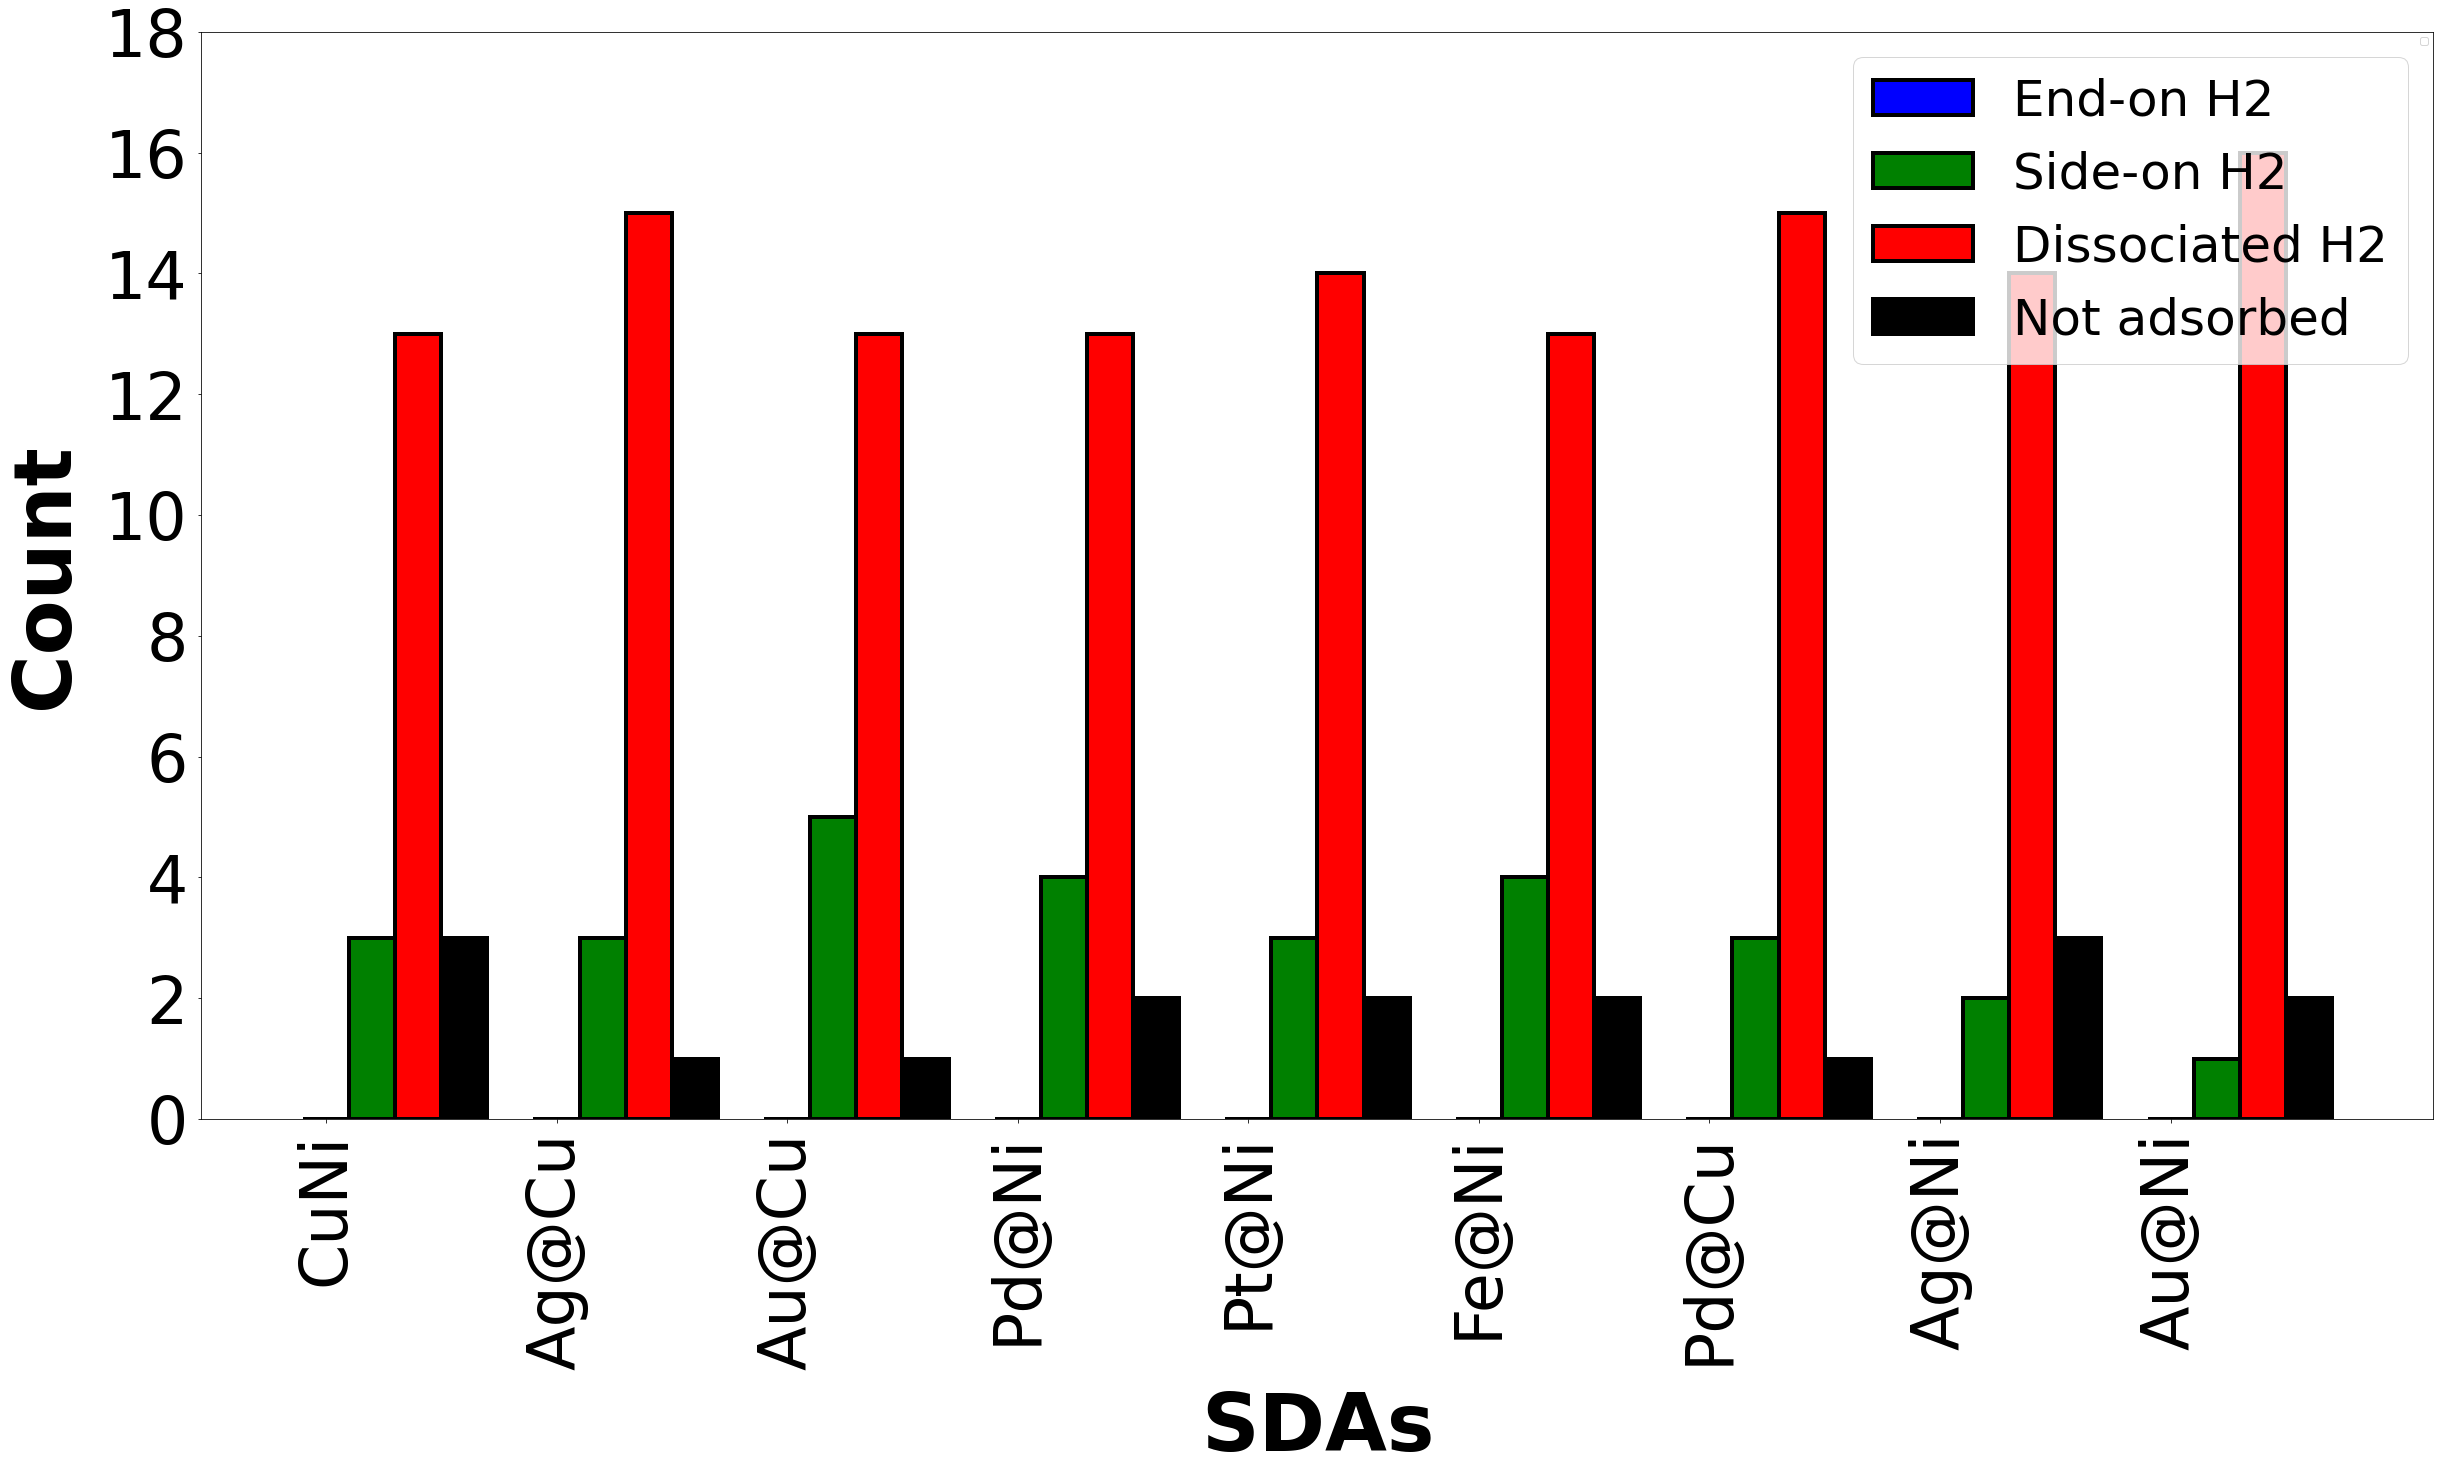

In [23]:
pylab.rcParams['xtick.major.pad']='10'
pylab.rcParams['ytick.major.pad']='10'

# Set the width of the bars
barWidth = 0.2
bar_group_dist = 0.2

# Set the position of the bars on the x-axis
x_labels = ['CuNi',
     'Ag@Cu',
     'Au@Cu',
     'Pd@Ni',
     'Pt@Ni',
     'Fe@Ni',
     'Pd@Cu',
     'Ag@Ni',
     'Au@Ni']

names = ['End-on H2','Side-on H2','Dissociated H2','Not adsorbed']
r1 = np.arange(len(adsorption_char_df['system']))
r2 = [x + bar_group_dist for x in r1]
r3 = [x + bar_group_dist for x in r2]
r4 = [x + bar_group_dist for x in r3]


fig = plt.figure(figsize=(40,20))
plt.ylim(0, 18)
# Create the bar plots
plt_vert = plt.bar(r1, adsorption_char_df['n_vertical_mol'], color='blue', width=barWidth, edgecolor='black',linewidth=4)
plt_horiz = plt.bar(r2, adsorption_char_df['n_horiz_mol'], color='green', width=barWidth, edgecolor='black',linewidth=4)
plt_diss = plt.bar(r3, adsorption_char_df['n_dissociated'], color='red', width=barWidth, edgecolor='black',linewidth=4)
plt_not = plt.bar(r4, adsorption_char_df['n_not_adsorbed'], color='black', width=barWidth, edgecolor='black',linewidth=4)
legend_1 = plt.legend([plt_vert,plt_horiz, plt_diss,plt_not], names, prop = { "size": 50 }, loc ="upper right",scatterpoints=1)
plt.gca().add_artist(legend_1)

# Add x-axis and y-axis labels and a title
plt.xlabel('SDAs',fontsize=80, labelpad=20,weight='bold')
plt.ylabel('Count',fontsize=80, labelpad=20,weight='bold')
plt.xticks(ticks=r1, labels=x_labels,rotation = 90,fontsize=65)
plt.yticks(fontsize=65)
#plt.title('')

# Add legend
plt.legend()

# Show the chart
plt.savefig('./count_ads_mode.pdf',bbox_inches='tight',dpi=500)
plt.show()